In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
hyper= pd.read_csv("BP-PPG.csv")
hyper

,Num.,subject_ID,Sex(M/F),Age(year),Height(cm),Weight(kg),Systolic Blood Pressure(mmHg),Diastolic Blood Pressure(mmHg),Heart Rate(b/m),BMI(kg/m^2),Hypertension,Diabetes,cerebral infarction,cerebrovascular disease
0,1,2,Female,45,152,63,161,89,97,27.27,Stage 2 hypertension,NaN,NaN,NaN
1,2,3,Female,50,157,50,160,93,76,20.28,Stage 2 hypertension,NaN,NaN,NaN
2,3,6,Female,47,150,47,101,71,79,20.89,Normal,NaN,NaN,NaN
3,4,8,Male,45,172,65,136,93,87,21.97,Prehypertension,NaN,NaN,NaN
4,5,9,Female,46,155,65,123,73,73,27.06,Prehypertension,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,215,415,Male,24,180,70,111,70,77,21.60,Normal,NaN,NaN,NaN
215,216,416,Female,25,156,47,93,57,79,19.31,Normal,NaN,NaN,NaN
216,217,417,Male,25,176,55,120,69,72,17.76,Prehypertension,NaN,NaN,NaN
217,218,418,Male,25,173,63,106,69,67,21.05,Normal,NaN,NaN,NaN


In [3]:
hyper.shape


(219, 14)

In [4]:
#listing all the columns
hyper.columns

Index(['Num.', 'subject_ID', 'Sex(M/F)', 'Age(year)', 'Height(cm)',
       'Weight(kg)', 'Systolic Blood Pressure(mmHg)',
       'Diastolic Blood Pressure(mmHg)', 'Heart Rate(b/m)', 'BMI(kg/m^2)',
       'Hypertension', 'Diabetes', 'cerebral infarction',
       'cerebrovascular disease'],
      dtype='object')

In [5]:
hyper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Num.                            219 non-null    int64  
 1   subject_ID                      219 non-null    int64  
 2   Sex(M/F)                        219 non-null    object 
 3   Age(year)                       219 non-null    int64  
 4   Height(cm)                      219 non-null    int64  
 5   Weight(kg)                      219 non-null    int64  
 6   Systolic Blood Pressure(mmHg)   219 non-null    int64  
 7   Diastolic Blood Pressure(mmHg)  219 non-null    int64  
 8   Heart Rate(b/m)                 219 non-null    int64  
 9   BMI(kg/m^2)                     219 non-null    float64
 10  Hypertension                    219 non-null    object 
 11  Diabetes                        38 non-null     object 
 12  cerebral infarction             20 n

In [6]:
#checking for unique values
hyper.nunique()

Num.                              219
subject_ID                        219
Sex(M/F)                            2
Age(year)                          56
Height(cm)                         34
Weight(kg)                         47
Systolic Blood Pressure(mmHg)      77
Diastolic Blood Pressure(mmHg)     51
Heart Rate(b/m)                    46
BMI(kg/m^2)                       162
Hypertension                        4
Diabetes                            2
cerebral infarction                 1
cerebrovascular disease             2
dtype: int64

In [7]:
#check for null values
hyper.isna().sum()

Num.                                0
subject_ID                          0
Sex(M/F)                            0
Age(year)                           0
Height(cm)                          0
Weight(kg)                          0
Systolic Blood Pressure(mmHg)       0
Diastolic Blood Pressure(mmHg)      0
Heart Rate(b/m)                     0
BMI(kg/m^2)                         0
Hypertension                        0
Diabetes                          181
cerebral infarction               199
cerebrovascular disease           194
dtype: int64

In [8]:
#dropping unnecessaries columns
new_hyper = hyper.drop(['Num.','subject_ID', 'Diabetes', 'cerebral infarction', 'cerebral infarction', 'cerebrovascular disease'], axis=1)

In [9]:
new_hyper

,Sex(M/F),Age(year),Height(cm),Weight(kg),Systolic Blood Pressure(mmHg),Diastolic Blood Pressure(mmHg),Heart Rate(b/m),BMI(kg/m^2),Hypertension
0,Female,45,152,63,161,89,97,27.27,Stage 2 hypertension
1,Female,50,157,50,160,93,76,20.28,Stage 2 hypertension
2,Female,47,150,47,101,71,79,20.89,Normal
3,Male,45,172,65,136,93,87,21.97,Prehypertension
4,Female,46,155,65,123,73,73,27.06,Prehypertension
...,...,...,...,...,...,...,...,...,...
214,Male,24,180,70,111,70,77,21.60,Normal
215,Female,25,156,47,93,57,79,19.31,Normal
216,Male,25,176,55,120,69,72,17.76,Prehypertension
217,Male,25,173,63,106,69,67,21.05,Normal


In [10]:
#Renaming some columns
new_hyper= new_hyper.rename({'Sex(M/F)':'Sex','Age(year)':'Age','Height(cm)':'Height', 'Weight(kg)':'Weight','Systolic Blood Pressure(mmHg)':'Systolic Blood Pressure', 'Diastolic Blood Pressure(mmHg)':'Diastolic Blood Pressure','Heart Rate(b/m)':'Heart Rate','BMI(kg/m^2)':'BMI'}, axis=1)
new_hyper

,Sex,Age,Height,Weight,Systolic Blood Pressure,Diastolic Blood Pressure,Heart Rate,BMI,Hypertension
0,Female,45,152,63,161,89,97,27.27,Stage 2 hypertension
1,Female,50,157,50,160,93,76,20.28,Stage 2 hypertension
2,Female,47,150,47,101,71,79,20.89,Normal
3,Male,45,172,65,136,93,87,21.97,Prehypertension
4,Female,46,155,65,123,73,73,27.06,Prehypertension
...,...,...,...,...,...,...,...,...,...
214,Male,24,180,70,111,70,77,21.60,Normal
215,Female,25,156,47,93,57,79,19.31,Normal
216,Male,25,176,55,120,69,72,17.76,Prehypertension
217,Male,25,173,63,106,69,67,21.05,Normal


In [11]:
#convert all the non numeric coluns to numeric columns
for column in new_hyper.columns:
    if new_hyper[column].dtype == np.int64 or new_hyper[column].dtype == np.float64:
          continue
    new_hyper[column] = LabelEncoder().fit_transform(new_hyper[column])

In [12]:
new_hyper

,Sex,Age,Height,Weight,Systolic Blood Pressure,Diastolic Blood Pressure,Heart Rate,BMI,Hypertension
0,0,45,152,63,161,89,97,27.27,3
1,0,50,157,50,160,93,76,20.28,3
2,0,47,150,47,101,71,79,20.89,0
3,1,45,172,65,136,93,87,21.97,1
4,0,46,155,65,123,73,73,27.06,1
...,...,...,...,...,...,...,...,...,...
214,1,24,180,70,111,70,77,21.60,0
215,0,25,156,47,93,57,79,19.31,0
216,1,25,176,55,120,69,72,17.76,1
217,1,25,173,63,106,69,67,21.05,0


In [13]:
new_hyper.describe()

,Sex,Age,Height,Weight,Systolic Blood Pressure,Diastolic Blood Pressure,Heart Rate,BMI,Hypertension
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.474886,57.168950,161.228311,60.191781,127.945205,71.849315,73.639269,23.107215,0.972603
std,0.500513,15.874327,8.202871,11.886301,20.377779,11.111203,10.738874,4.004302,0.942950
min,0.000000,21.000000,145.000000,36.000000,80.000000,42.000000,52.000000,14.690000,0.000000
25%,0.000000,48.000000,155.000000,52.500000,113.500000,64.000000,66.000000,20.550000,0.000000
50%,0.000000,58.000000,160.000000,60.000000,126.000000,70.000000,73.000000,22.600000,1.000000
75%,1.000000,67.500000,167.000000,66.500000,139.000000,78.000000,80.000000,25.000000,1.000000
max,1.000000,86.000000,196.000000,103.000000,182.000000,107.000000,106.000000,37.460000,3.000000


In [14]:
new_hyper.nunique()

Sex                           2
Age                          56
Height                       34
Weight                       47
Systolic Blood Pressure      77
Diastolic Blood Pressure     51
Heart Rate                   46
BMI                         162
Hypertension                  4
dtype: int64

In [15]:
#Correlation bethween the numerical variables
correlation = new_hyper.corr()
correlation

,Sex,Age,Height,Weight,Systolic Blood Pressure,Diastolic Blood Pressure,Heart Rate,BMI,Hypertension
Sex,1.000000,0.069529,0.641605,0.299980,0.093413,0.075614,0.007268,-0.035866,0.047132
Age,0.069529,1.000000,-0.223746,-0.099021,0.412908,-0.003054,-0.085640,0.016326,0.343228
Height,0.641605,-0.223746,1.000000,0.503374,0.004164,0.143565,-0.070610,-0.029678,-0.030619
Weight,0.299980,-0.099021,0.503374,1.000000,0.200903,0.280858,-0.129834,0.844266,0.178503
Systolic Blood Pressure,0.093413,0.412908,0.004164,0.200903,1.000000,0.721115,0.137817,0.226345,0.934292
Diastolic Blood Pressure,0.075614,-0.003054,0.143565,0.280858,0.721115,1.000000,0.194682,0.233031,0.669028
Heart Rate,0.007268,-0.085640,-0.070610,-0.129834,0.137817,0.194682,1.000000,-0.105521,0.096414
BMI,-0.035866,0.016326,-0.029678,0.844266,0.226345,0.233031,-0.105521,1.000000,0.220514
Hypertension,0.047132,0.343228,-0.030619,0.178503,0.934292,0.669028,0.096414,0.220514,1.000000


<AxesSubplot:>

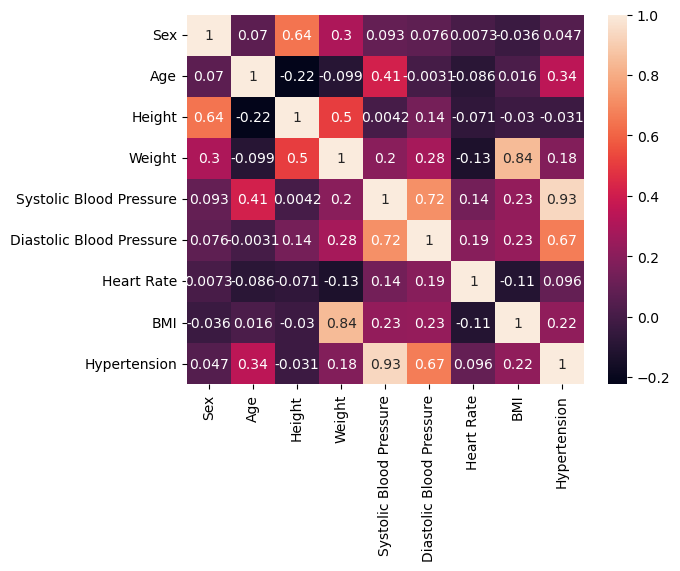

In [16]:
sns.heatmap(correlation,xticklabels=correlation.columns, yticklabels=correlation.columns,annot=True)

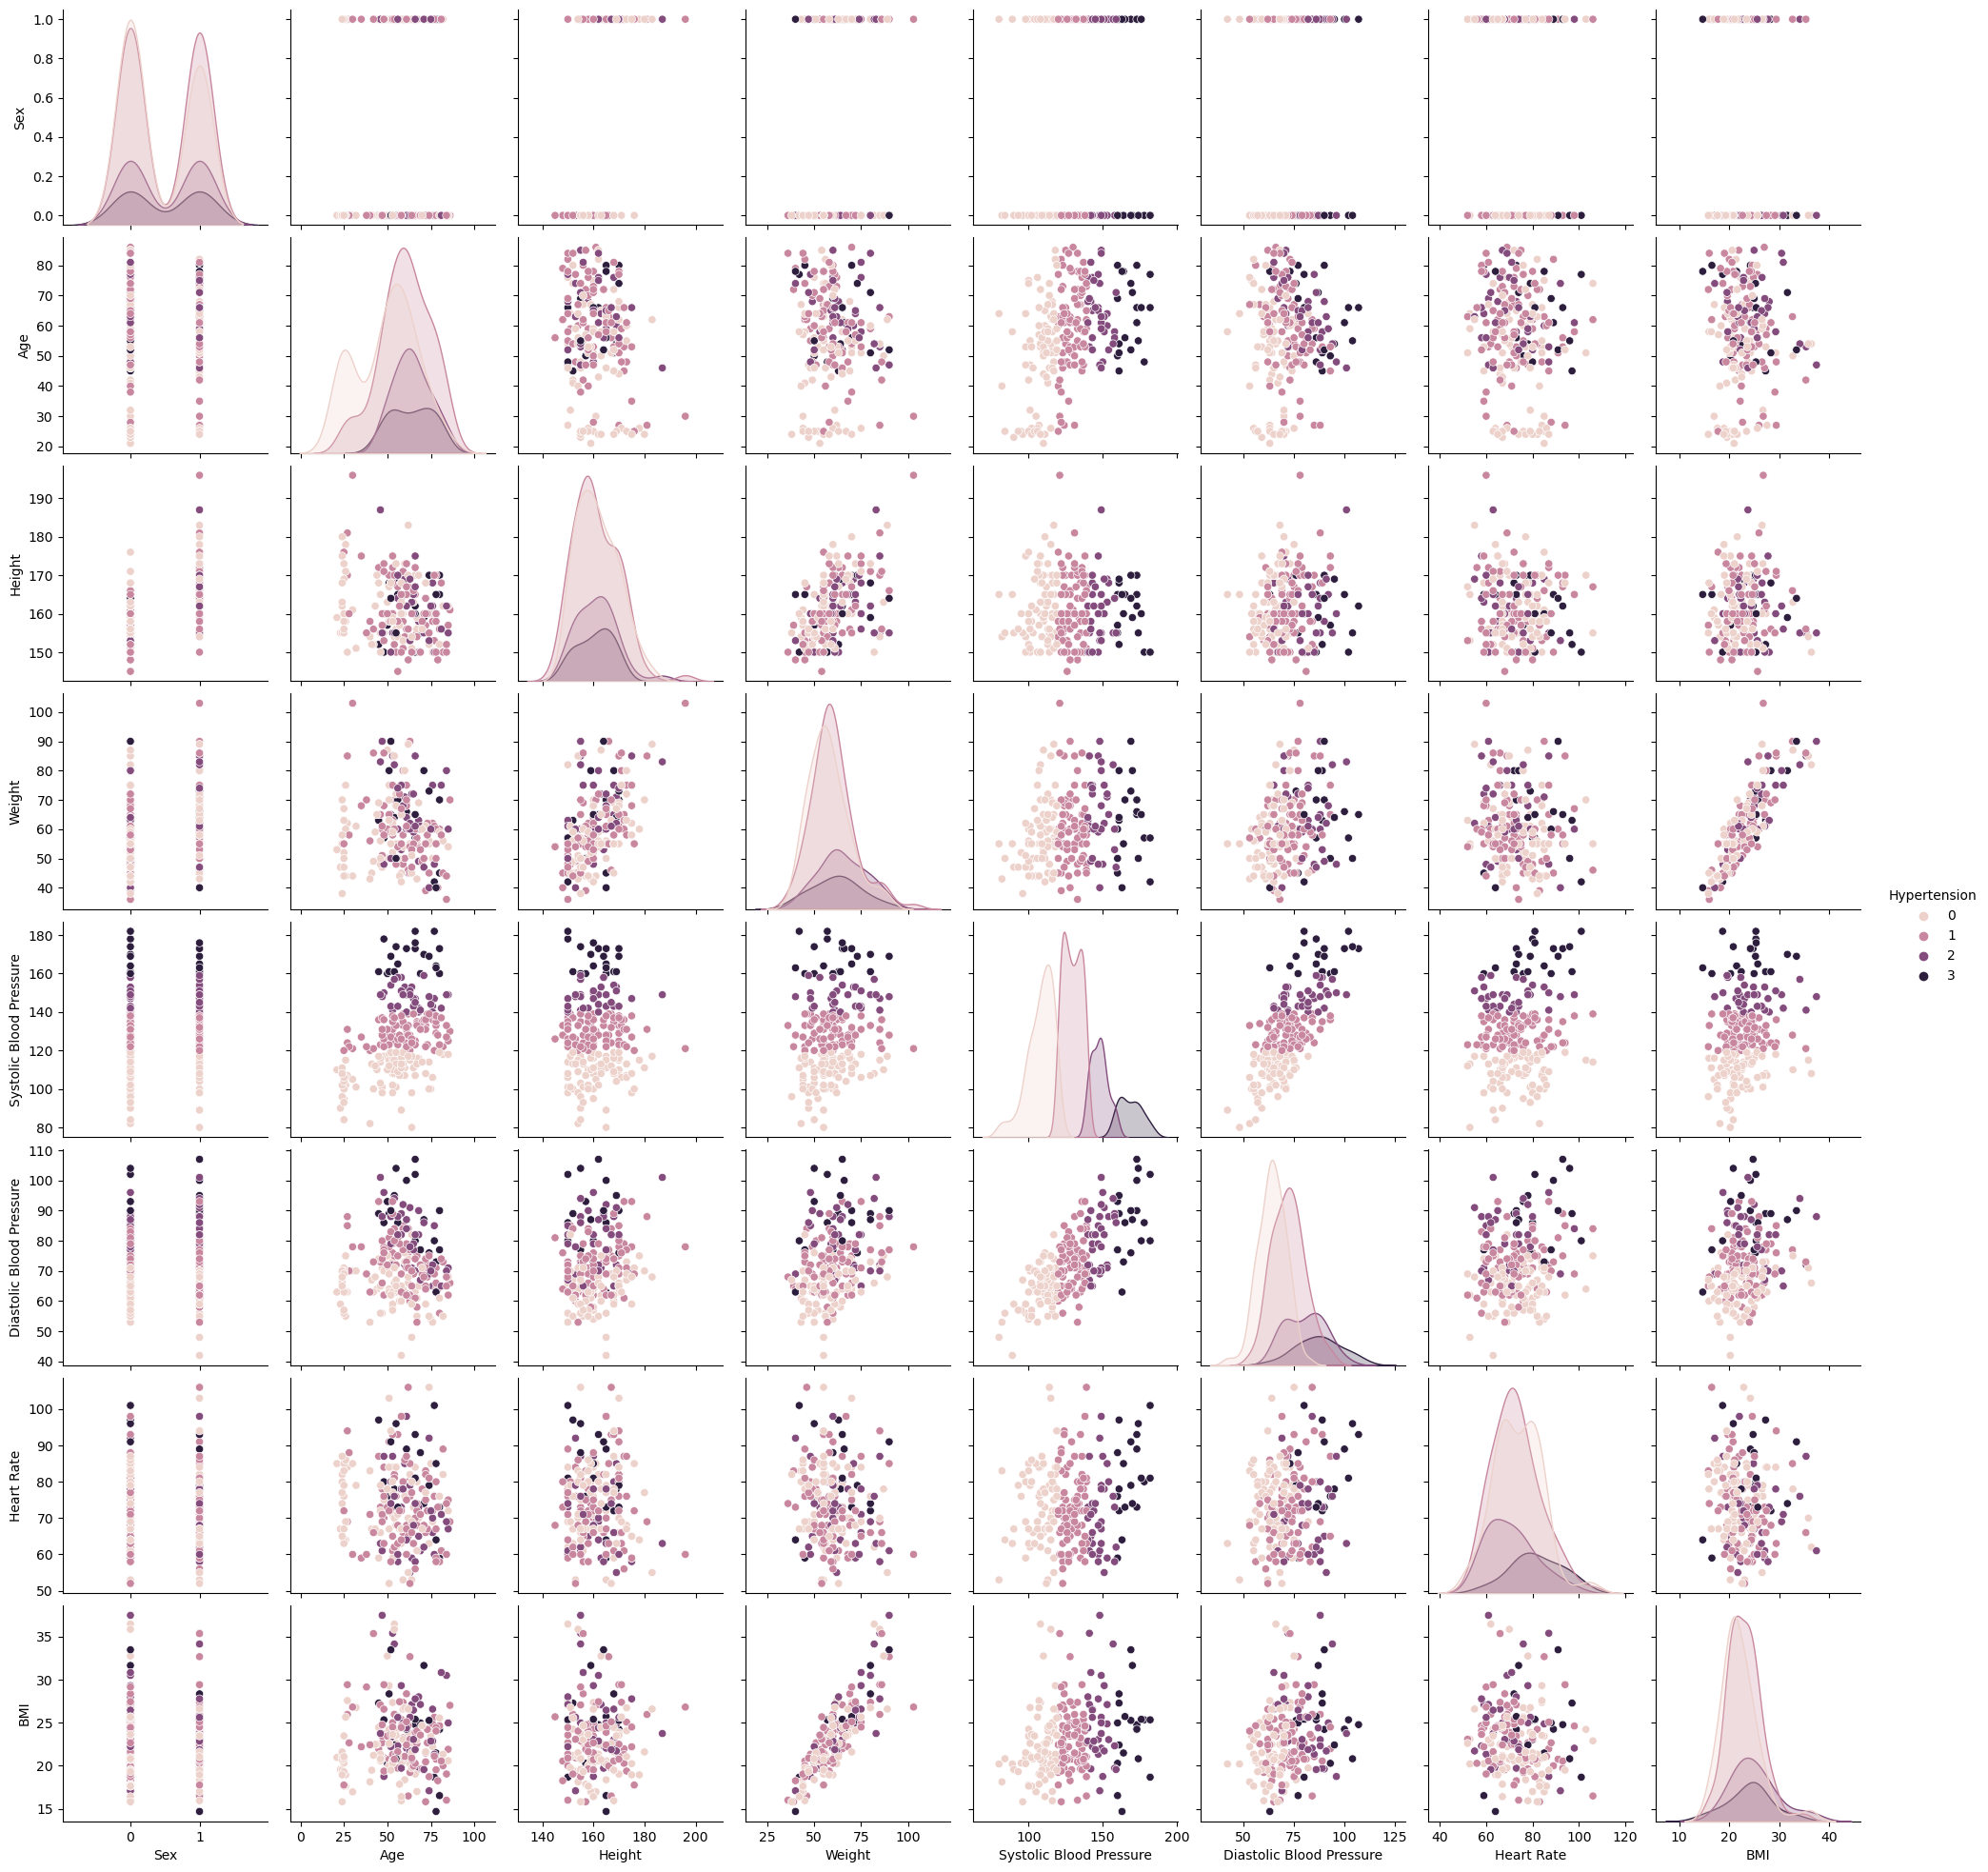

In [17]:
#bivariate pairplot
sns.pairplot(new_hyper, hue='Hypertension')

In [18]:
# case of hypertension counted
new_hyper['Hypertension'].value_counts()

1    85
0    80
2    34
3    20
Name: Hypertension, dtype: int64

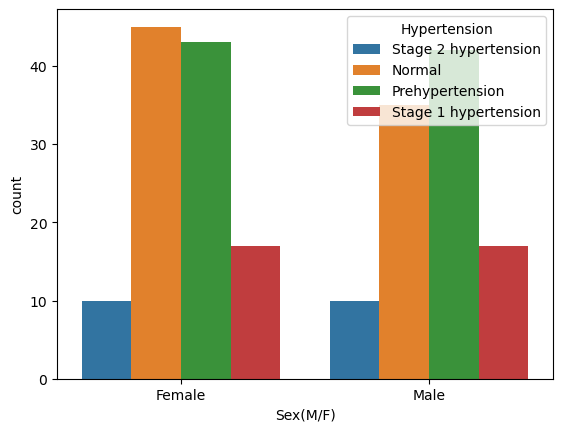

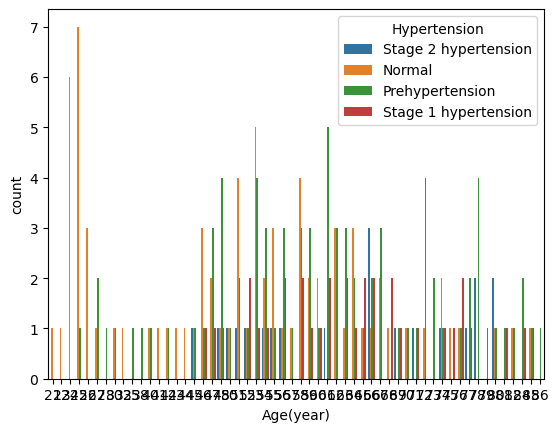

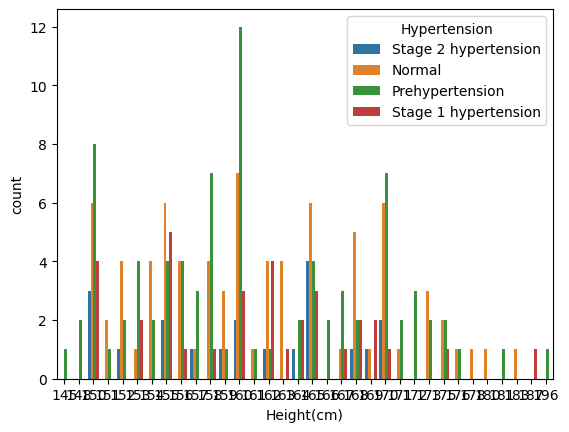

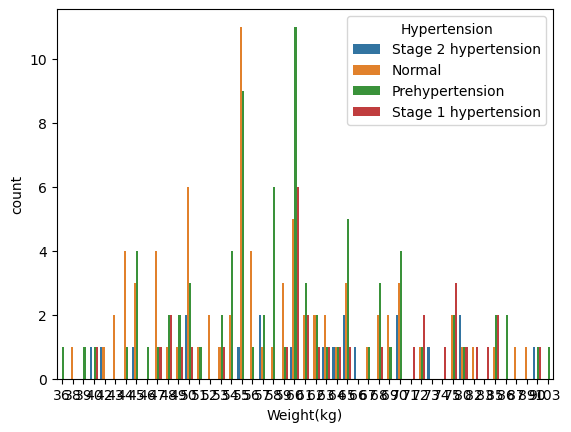

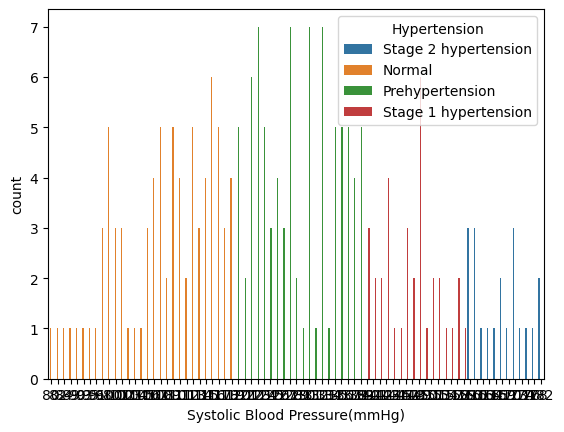

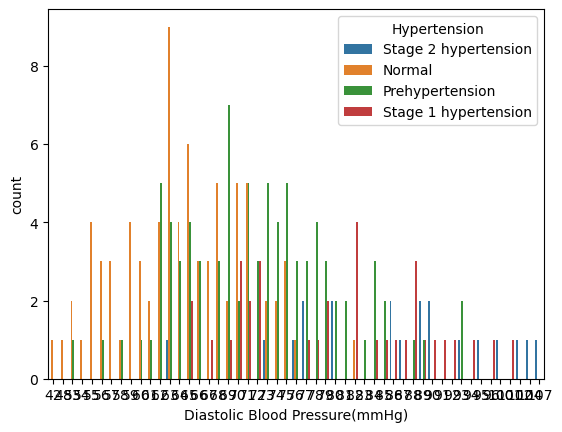

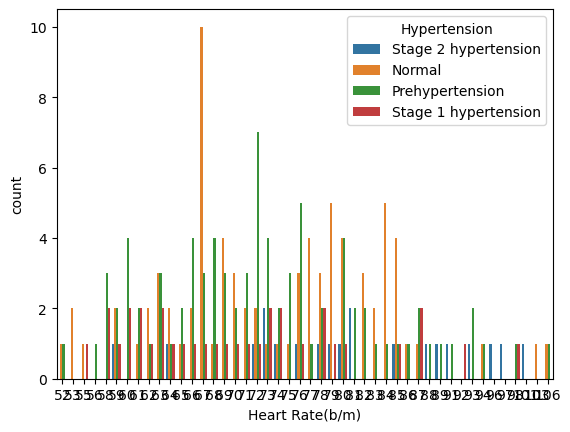

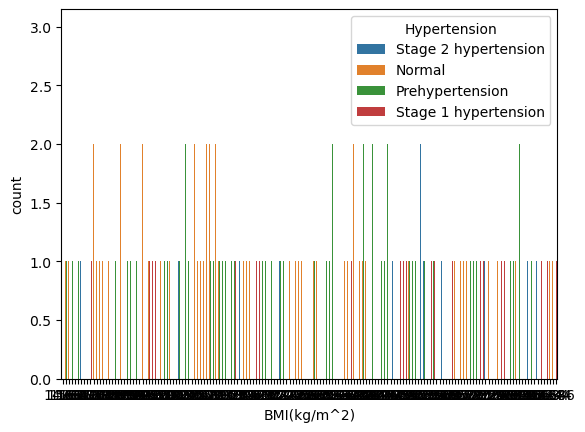

In [19]:

for i, predictor in enumerate(hyper.drop(columns=['Hypertension', 'Num.','subject_ID', 'Diabetes', 'cerebral infarction', 'cerebral infarction', 'cerebrovascular disease'])):
    plt.figure(i)
    sns.countplot(data=hyper, x=predictor, hue='Hypertension')

In [ ]:
new_hyper['Hypertension'].value_counts().plot
plt.show()

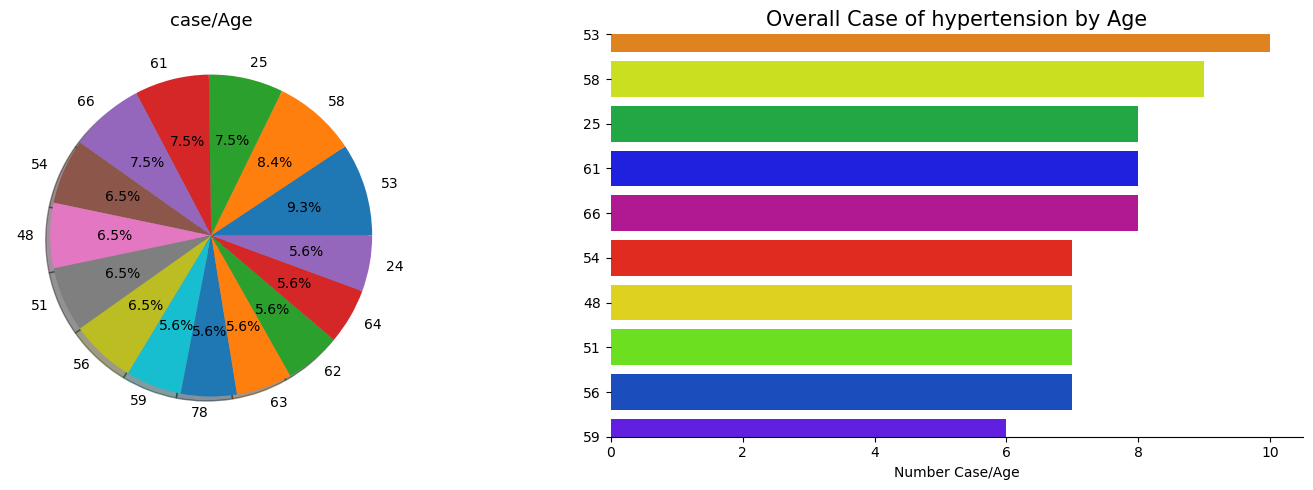

In [21]:
#Visualize the number of patients are hypertensive
fig, axes = plt.subplots(1,2, figsize=(15, 5))

sns.countplot(y='Age', data=new_hyper, order=new_hyper['Age'].value_counts().index, palette='prism', ax=axes[1])
sns.despine(bottom=False, left=True)
axes[1].set_ylim([9, 0])
axes[1].set_title('Overall Case of hypertension by Age', size=15)
axes[1].set(xlabel='Number Case/Age', ylabel='')
plt.tight_layout()
new_hyper['Age'].value_counts().head(15).plot.pie(autopct='%1.1f%%',ax=axes[0], shadow=True)
axes[0].set_title('case/Age', size=13)
axes[0].set(xlabel='', ylabel='')

sns.despine(bottom=False, left=True)

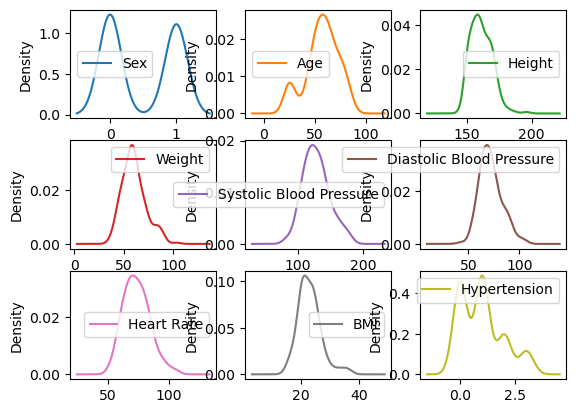

In [22]:
new_hyper.plot(kind='density', subplots=True, layout=(3,3),sharex=False)
plt.show()

In [23]:
#declaring data
data = new_hyper['Hypertension'].value_counts()
keys = ['normal', 'stage 2 hypertension','prehypertension', 'stage 1 hypertension' ]
explode = [0.1, 0'2, 0.1, 0.2]
# plotting data on chart
plt.pie(data, labels=keys,explode=explode,autopct='%.0f%%')
# displaying chart
plt.show()

SyntaxError: EOL while scanning string literal (431294248.py, line 4)

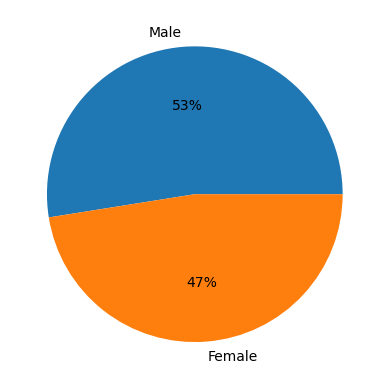

In [24]:
#declaring data
data = new_hyper['Sex'].value_counts()
keys = ['Male', 'Female']
explode = [0, 0,]
# plotting data on chart
plt.pie(data, labels=keys,explode=explode,autopct='%.0f%%')
# displaying chart
plt.show()

Text(0, 0.5, 'Hypertension')

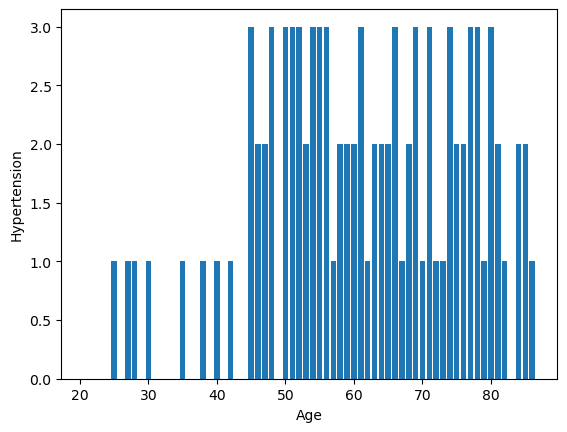

In [25]:
plt.bar(new_hyper['Age'], new_hyper['Hypertension'])
plt.xlabel('Age')
plt.ylabel('Hypertension')


In [27]:
X = new_hyper.drop("Hypertension", axis=1)
y = new_hyper["Hypertension"]

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [29]:
X_train

,Sex,Age,Height,Weight,Systolic Blood Pressure,Diastolic Blood Pressure,Heart Rate,BMI
5,0,48,160,68,124,62,70,26.56
134,1,77,170,61,138,69,76,21.11
2,0,47,150,47,101,71,79,20.89
171,0,58,160,42,111,65,67,16.41
3,1,45,172,65,136,93,87,21.97
...,...,...,...,...,...,...,...,...
43,0,51,158,50,110,63,67,20.03
22,1,51,170,60,129,81,91,20.76
72,1,59,171,80,133,77,66,27.36
15,0,48,150,57,178,86,80,25.33


In [30]:
X_test

,Sex,Age,Height,Weight,Systolic Blood Pressure,Diastolic Blood Pressure,Heart Rate,BMI
85,1,78,160,50,129,64,67,19.53
106,0,85,162,54,118,68,72,20.58
152,0,65,165,72,143,77,63,26.45
35,1,52,168,65,154,88,80,23.03
20,1,54,170,70,125,75,82,24.22
216,1,25,176,55,120,69,72,17.76
65,1,76,168,75,143,65,66,26.57
189,0,69,150,53,131,72,71,23.56
139,0,72,160,55,131,74,75,21.48
23,1,80,170,70,173,90,73,24.22


In [31]:
X_test.shape

(44, 8)

In [32]:
y_train

5      1
134    1
2      0
171    0
3      1
      ..
43     0
22     1
72     1
15     3
168    2
Name: Hypertension, Length: 175, dtype: int32

In [33]:
y_test

85     1
106    0
152    2
35     2
20     1
216    1
65     2
189    1
139    1
23     3
142    0
146    1
10     1
54     2
169    3
13     0
187    1
24     3
181    2
41     0
84     1
30     0
143    0
184    1
186    2
101    1
64     1
205    0
197    2
25     0
74     1
109    0
53     0
157    2
202    1
193    0
89     0
6      1
28     2
12     0
29     0
66     0
18     0
44     0
Name: Hypertension, dtype: int32

In [34]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [35]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [36]:
X_train_std

array([[-0.97182532, -0.56200105, -0.15174809, ..., -0.88443463,
        -0.3102974 ,  0.88790037],
       [ 1.02899151,  1.2985047 ,  1.08918257, ..., -0.23838071,
         0.2409924 , -0.465217  ],
       [-0.97182532, -0.62615642, -1.39267875, ..., -0.05379388,
         0.5166373 , -0.51983825],
       ...,
       [ 1.02899151,  0.14370803,  1.21327564, ...,  0.49996662,
        -0.67782394,  1.0865231 ],
       [-0.97182532, -0.56200105, -1.39267875, ...,  1.33060737,
         0.60851894,  0.58251791],
       [ 1.02899151,  0.14370803,  0.46871724, ...,  1.88436787,
         0.42475567,  0.49562047]])

In [37]:
#creating the model
model_log=LogisticRegression()
# Train the model
model_log.fit(X_train_std, y_train)
model_log

LogisticRegression()

In [38]:
pred= model_log.predict(X_test_std)
pred

array([1, 1, 2, 3, 1, 0, 1, 1, 1, 3, 0, 0, 1, 3, 3, 1, 1, 3, 1, 0, 1, 0,
       0, 1, 2, 1, 1, 0, 2, 0, 1, 1, 0, 2, 1, 0, 0, 1, 3, 1, 0, 0, 0, 0])

In [39]:
#calculate the accuracy
from sklearn.metrics import accuracy_score
print (accuracy_score(y_test, pred)*100)

75.0


In [40]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81        17
           1       0.68      0.87      0.76        15
           2       1.00      0.44      0.62         9
           3       0.50      1.00      0.67         3

    accuracy                           0.75        44
   macro avg       0.76      0.77      0.71        44
weighted avg       0.81      0.75      0.75        44



In [41]:
# creating KNN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
#training the model
knn.fit(X_train_std, y_train)
knn

KNeighborsClassifier()

In [42]:
#Prediction on the test data
k_pred=knn.predict(X_test_std)
k_pred

array([1, 1, 1, 2, 1, 0, 1, 1, 1, 3, 0, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 0,
       0, 1, 2, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0])

In [43]:
#using confusion matrix to check the prediction
cmat1=confusion_matrix(y_test, k_pred)
print(cmat1)

[[11  6  0  0]
 [ 1 14  0  0]
 [ 0  7  2  0]
 [ 0  0  0  3]]


In [60]:
#check the accuracy of the KNN model
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test, k_pred))

              precision    recall  f1-score   support

           0       0.92      0.65      0.76        17
           1       0.52      0.93      0.67        15
           2       1.00      0.22      0.36         9
           3       1.00      1.00      1.00         3

    accuracy                           0.68        44
   macro avg       0.86      0.70      0.70        44
weighted avg       0.80      0.68      0.66        44



In [45]:
 #creating decision tree model 
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion = "gini",random_state = 42,max_depth=6, min_samples_leaf=8)
#training the model
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=42)

In [46]:
#Prediction on the test data
tree_pred=tree.predict(X_test)
tree_pred

array([1, 0, 2, 2, 1, 1, 2, 1, 1, 3, 0, 1, 1, 2, 3, 0, 1, 3, 2, 0, 1, 0,
       0, 1, 2, 1, 1, 0, 2, 0, 1, 0, 0, 2, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0])

In [47]:
#using confusion matrix to check the prediction
cmat2=confusion_matrix(y_test,tree_pred)
print(cmat2)

[[17  0  0  0]
 [ 0 15  0  0]
 [ 0  0  9  0]
 [ 0  0  0  3]]


In [48]:
#check the accuracy of the decision tree model
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test, tree_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         3

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44



In [49]:
#creating random forest model 
from sklearn.ensemble import RandomForestClassifier
Rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 42,max_depth=6, min_samples_leaf=8)
Rf.fit(X_train_std,y_train)
RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=42)
Rf

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=42)

In [50]:
#checking the prediction
rf_pred=Rf.predict(X_test_std)
rf_pred

array([1, 0, 2, 2, 1, 1, 1, 1, 1, 3, 0, 1, 1, 2, 3, 0, 1, 3, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 2, 0, 1, 0, 0, 2, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0])

In [51]:
#using confusion matrix to check the prediction
cmat3=confusion_matrix(y_test,rf_pred)
print(cmat3)

[[17  0  0  0]
 [ 0 15  0  0]
 [ 0  3  6  0]
 [ 0  0  0  3]]


In [52]:
#check the accuracy of the random forest model
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.83      1.00      0.91        15
           2       1.00      0.67      0.80         9
           3       1.00      1.00      1.00         3

    accuracy                           0.93        44
   macro avg       0.96      0.92      0.93        44
weighted avg       0.94      0.93      0.93        44



In [62]:
#Lets print the all 4 accuracy
print ("Accuracy score of logistic regression model:" ,accuracy_score(y_test, pred)*100)
print ("Accuracy score of K-Nearest neighbor model:" ,accuracy_score(y_test, k_pred)*100)
print ("Accuracy score of decision tree model:" ,accuracy_score(y_test, tree_pred)*100)
print ("Accuracy score of random forest model:" ,accuracy_score(y_test, rf_pred)*100)

Accuracy score of logistic regression model: 75.0
Accuracy score of K-Nearest neighbor model: 68.18181818181817
Accuracy score of decision tree model: 100.0
Accuracy score of random forest model: 93.18181818181817


In [54]:
#Lets print the all 4 confusions matrix
print ("Confusion matrix of logistic regression model: \n" ,confusion_matrix(y_test, pred))
print ("Confusion matrix  of K-Nearest neighbor model: \n" ,confusion_matrix(y_test, k_pred))
print ("Confusion matrix  of decision tree model: \n" ,confusion_matrix(y_test, tree_pred))
print ("Confusion matrix  of random forest model: \n" ,confusion_matrix(y_test, rf_pred))

Confusion matrix of logistic regression model: 
 [[13  4  0  0]
 [ 2 13  0  0]
 [ 0  2  4  3]
 [ 0  0  0  3]]
Confusion matrix  of K-Nearest neighbor model: 
 [[11  6  0  0]
 [ 1 14  0  0]
 [ 0  7  2  0]
 [ 0  0  0  3]]
Confusion matrix  of decision tree model: 
 [[17  0  0  0]
 [ 0 15  0  0]
 [ 0  0  9  0]
 [ 0  0  0  3]]
Confusion matrix  of random forest model: 
 [[17  0  0  0]
 [ 0 15  0  0]
 [ 0  3  6  0]
 [ 0  0  0  3]]


In [55]:
import pickle

In [56]:
model = 'model.pkl'
pickle.dump(tree, open(model,'wb'))

In [57]:
#load the model
loaded_model = pickle.load(open('model.pkl', 'rb'))

In [58]:
#making a prediction
tree.predict([[0,50,157,50,160,93,76,20.28]])

array([3])